### Supervised Learning – Linear Regression
### Practical task 1: Insurance dataset

Bronwyn Bowles-King

Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Load dataset

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Determine how age affects insurance costs
Scatter plot with age on the x-axis and charges on the y-axis.

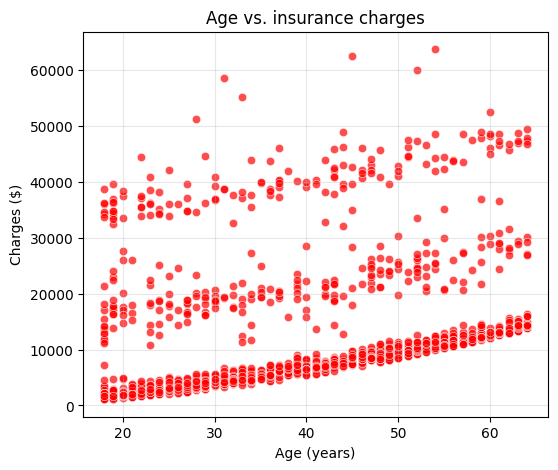

In [3]:
plt.figure(figsize=(6, 5))  
sns.scatterplot(
    data=df,
    x='age',          
    y='charges',     
    color='red',
    alpha=0.7
)
plt.title('Age vs. insurance charges')  
plt.xlabel('Age (years)')               
plt.ylabel('Charges ($)')               
plt.grid(alpha=0.3)                    
plt.show()

Using linear_model.LinearRegression() from sklearn, fit a model to the data, and make predictions on the data.

In [4]:
# Extract features (X = age) and target (y = charges)
X = df[['age']]  
y = df['charges'] 

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

# Initialise the linear regression model and train on the training data
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [5]:
# Predict on the test set 
y_pred = model.predict(X_test)

# View first 5 predictions and compare with test data
comparison_df = pd.DataFrame({
    'Predicted charges': y_pred[:5],
    'Actual age': X_test['age'].head(), 
    'Actual charges': y_test.head()
})

print(f"Table: First 5 individuals' predictions and actual data")
print(comparison_df)

Table: First 5 individuals' predictions and actual data
      Predicted charges  Actual age  Actual charges
764        14703.773875          45      9095.06825
887        12538.404837          36      5272.17580
890        19275.108511          64     29330.98315
1293       14944.370434          46      9301.89355
259         8448.263320          19     33750.29180


The great difference in predicted and actual charges above is because the current model does not account for other variables affecting how much one pays for insurance. Using only age leads to errors, especially for individuals whose lifestyle factors that play a key role (smoking and BMI). 

Below, we can compare the prediction and actual charges based on a specific age.

In [6]:
# Check prediction for a specific age: 50 years
new_age_df = pd.DataFrame({'age': [50]})
predicted_charge = model.predict(new_age_df)
print(f"Predicted charge for age 50: ${predicted_charge[0]:.2f}")

# Filter for individuals aged 50 and display results
age_50_data = df[df['age'] == 50]
print(age_50_data.head())

Predicted charge for age 50: $15906.76
     age     sex     bmi  children smoker     region      charges
159   50  female  27.830         3     no  southeast  19749.38338
254   50    male  31.825         0    yes  northeast  41097.16175
271   50    male  34.200         2    yes  southwest  42856.83800
273   50    male  27.455         1     no  northeast   9617.66245
310   50    male  26.600         0     no  southwest   8444.47400


In [7]:
# Check prediction for a specific age: 35 years
new_age_df = pd.DataFrame({'age': [35]})
predicted_charge = model.predict(new_age_df)
print(f"Predicted charge for age 35: ${predicted_charge[0]:.2f}")

# Filter for individuals aged 35 and display results
age_35_data = df[df['age'] == 35]
print(age_35_data.head())

Predicted charge for age 35: $12297.81
     age     sex    bmi  children smoker     region     charges
38    35    male  36.67         1    yes  northeast  39774.2763
93    35    male  34.77         2     no  northwest   5729.0053
150   35    male  24.13         1     no  northwest   5125.2157
173   35  female  34.80         1     no  southwest   5246.0470
207   35    male  27.74         2    yes  northeast  20984.0936


In [8]:
# Calculate model intercept and coefficient
print(f"Slope (coefficient): {model.coef_[0]:.2f}")  # Slope shows rate of change in charges as age increases
print(f"Intercept: {model.intercept_:.2f}")  # Where age is 0

Slope (coefficient): 240.60
Intercept: 3876.93


Plot data again with the best-fit line.

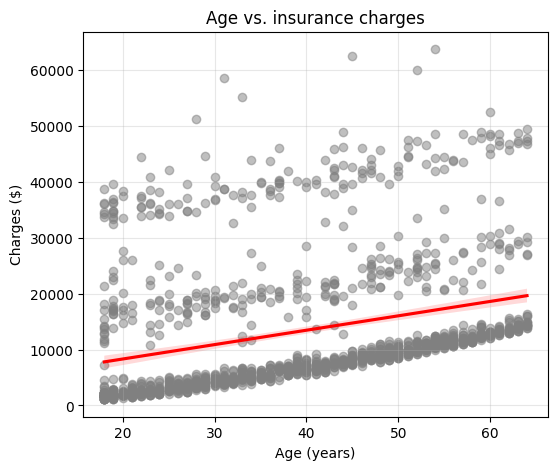

In [9]:
plt.figure(figsize=(6, 5))
sns.regplot(
    data=df,
    x='age',
    y='charges',
    scatter_kws={'color': 'grey', 'alpha': 0.5},  
    line_kws={'color': 'red'}  # Regression line. 95% confidence interval is default
)
plt.title('Age vs. insurance charges')
plt.xlabel('Age (years)')
plt.ylabel('Charges ($)')
plt.grid(alpha=0.3)
plt.show()